In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

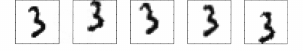

Fig.1 A synthetic data set obtained by taking one of the off-line digit images and creating multiple copies in each of which the digit has undergone a random displacement and rotation within some larger image field. The resulting images each have 100 x 100 = 10,000 pixels.

## Continuous Latent Variables and Manifold Learning

In Chapter 9, we discussed probabilistic models with discrete latent variables, such as the mixture of Gaussians. Now, we explore models in which some or all of the latent variables are continuous. These models are important because many real-world datasets have the property that the data points lie close to a manifold of much lower dimensionality than the original data space.

## Motivating Example: Embedding of Digit Images

Consider an artificial dataset constructed by taking an off-line digit image (e.g., a 64x64 pixel grayscale image) and embedding it into a larger image of size 100x100 by padding it with white pixels (value zero). The location and orientation of the digit are varied randomly within the larger image. This process is illustrated in the figure below.

![Synthetic Dataset Example](path/to/figure.jpg)

Each resulting image is represented as a point in a 10,000-dimensional space (since $100 \times 100 = 10,000$ pixels). However, across a dataset of such images, there are only three degrees of freedom for variability: vertical and horizontal translations, and rotations. The data points will therefore live on a subspace of this 10,000-dimensional space with intrinsic dimensionality 3. The manifold formed by these images will be nonlinear because the pixel values (which correspond to image intensities) change nonlinearly with the digit's position and orientation.

Thus, the latent variables in this case are the translations and rotations of the digit. We observe only the image vectors and are not told which translation or rotation parameters were used to generate the images.

### Real-World Example: Oil Flow Data

Consider the oil flow data set, where the data space consists of 12 measurements, but only two degrees of freedom of variability correspond to the fraction of oil and the fraction of water. The oil, water, and gas phases are distributed in a pipe, and although the data space has 12 measurements, the data points lie close to a 2D manifold. In this case, the manifold may have different segments corresponding to different flow regimes.

## The Role of Latent Variables

In many cases, the data points do not lie exactly on a manifold. This discrepancy can be treated as 'noise'. From a generative perspective, we first select a point from the manifold, based on some latent variable distribution, and then generate the observed data point by adding noise, which is drawn from a conditional distribution of the data variables given the latent variables.

### Linear-Gaussian Latent Variable Models

The simplest continuous latent variable model assumes Gaussian distributions for both the latent and observed variables. These models often assume a linear-Gaussian relationship between the observed variables and the latent variables. This assumption leads to two important models:

1. **Principal Component Analysis (PCA)**: 
   PCA can be seen as a linear dimensionality reduction technique where the data is projected onto a lower-dimensional subspace. We will first look at PCA from a non-probabilistic perspective.

2. **Factor Analysis**: 
   Factor analysis is a probabilistic model related to PCA. In factor analysis, we assume that the observed data is a linear transformation of some latent variables, plus Gaussian noise. Factor analysis extends PCA by introducing a probabilistic model for the latent variables and the noise.

## PCA as a Maximum Likelihood Solution

PCA can be derived as the maximum likelihood solution to a probabilistic model where both the observed and latent variables follow a Gaussian distribution. In PCA, we seek a lower-dimensional representation of the data that captures the most significant variance, which can be interpreted as finding the principal components of the data.

### Model Formulation

Let the observed data vector $ \mathbf{z} $ be represented as:

$$ \mathbf{z} = W \mathbf{r} + \epsilon $$

where:

- $ W $ is the matrix of loadings (the principal components),
- $ \mathbf{r} $ is the vector of latent variables,
- $ \epsilon $ is Gaussian noise, typically assumed to have zero mean and covariance $ \sigma^2 I $.

By maximizing the likelihood of observing the data, we can derive the PCA components, which are the eigenvectors of the data covariance matrix.

---


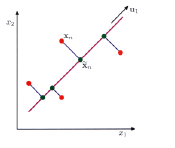

## Principal Component Analysis (PCA) and Latent Variables

### Figure : Principal Component Analysis

Principal Component Analysis (PCA) seeks a lower-dimensional space, known as the **principal subspace** (denoted by the magenta line), onto which the data points (represented as red dots) are orthogonally projected. This projection maximizes the variance of the projected data points (green dots). An alternative definition of PCA is based on minimizing the sum of the squared projection errors, indicated by the blue lines.

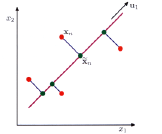


Fig.2 Principal component analysis seeks a space
of lower dimensionality, known as the principal subspace and denoted by the magenta line, such that the orthogonal projection of the data points (red dots) onto this subspace maximizes the variance of the projected points (green dots). An alternative definition of PCA is based on minimizing the sum-of-squares of the projection errors, indicated by the blue lines.

---

## Principal Component Analysis

Principal Component Analysis (PCA) is a widely-used technique for dimensionality reduction, data compression, feature extraction, and data visualization. It is also known as the **Karhunen-Loève transform**.

There are two commonly used definitions of PCA, both of which lead to the same algorithm:

1. **Maximum Variance Formulation**: PCA can be defined as the orthogonal projection of the data onto a lower-dimensional linear space (the principal subspace), such that the variance of the projected data is maximized (Hotelling, 1933).
   
2. **Minimization of Projection Error**: Alternatively, PCA can be defined as the linear projection that minimizes the average projection cost, defined as the mean squared distance between the data points and their projections (Pearson, 1901).

### Maximum Variance Formulation

Consider a dataset consisting of $ N $ observations $ \mathbf{x}_i $ where $ i = 1, 2, \dots, N $ and each $ \mathbf{x}_i $ is a vector in $ \mathbb{R}^D $, i.e., it has dimensionality $ D $. The goal of PCA is to project these data points onto a lower-dimensional space of dimensionality $ M $ (with $ M < D $) while maximizing the variance of the projected data points. For the moment, we assume that the value of $ M $ is given.

#### Projection and Variance Maximization

The data points are projected onto a subspace spanned by $ M $ orthonormal vectors $ \mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_M $. This projection is performed such that the variance of the projected data is maximized, which can be expressed mathematically as:

$$
\text{Maximize} \quad \text{Var}(P(\mathbf{x}_i)) = \text{Maximize} \quad \frac{1}{N} \sum_{i=1}^N \left( \mathbf{x}_i - \mathbf{P}(\mathbf{x}_i) \right)^2
$$

where \( \mathbf{P}(\mathbf{x}_i) \) represents the projection of $ \mathbf{x}_i $ onto the principal subspace.

In this formulation, PCA seeks the projection matrix $ W = [\mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_M] $ that maximizes the variance of the projected data points $ \mathbf{P}(\mathbf{x}_i) $.

---

Later in this chapter, we will explore the **probabilistic reformulation** of PCA, which brings several advantages, such as:

- The use of the **Expectation-Maximization (EM)** algorithm for parameter estimation,
- The introduction of **mixtures of PCA models**,
- **Bayesian formulations** that automatically determine the number of principal components from the data.

We will also discuss generalizations of the latent variable concept, going beyond the linear-Gaussian assumption. This includes non-Gaussian latent variables, leading to **Independent Component Analysis (ICA)**, and models with **nonlinear relationships** between latent and observed variables.

---



In [1]:
# Implementation of PCA without using NumPy
import math

# Function to compute the mean of each column (feature)
def compute_mean(data):
    n = len(data)
    means = []
    num_features = len(data[0])  # Number of features in each data point
    for j in range(num_features):
        feature_sum = sum(row[j] for row in data)
        means.append(feature_sum / n)
    return means

# Function to center the data by subtracting the mean of each feature
def center_data(data, means):
    centered_data = []
    for row in data:
        centered_data.append([row[j] - means[j] for j in range(len(row))])
    return centered_data

# Function to compute the covariance matrix
def compute_covariance_matrix(centered_data):
    n = len(centered_data)
    num_features = len(centered_data[0])
    covariance_matrix = [[0 for _ in range(num_features)] for _ in range(num_features)]
    
    for i in range(num_features):
        for j in range(num_features):
            cov_sum = sum(centered_data[k][i] * centered_data[k][j] for k in range(n))
            covariance_matrix[i][j] = cov_sum / (n - 1)  # sample covariance
    
    return covariance_matrix

# Function to compute the eigenvalues and eigenvectors of a matrix
def compute_eigenvalues_and_eigenvectors(matrix):
    # For simplicity, let's assume we are using a basic method or external implementation
    # to calculate eigenvalues and eigenvectors. Here we'll simulate it:
    # In practice, you'd likely use a method like `numpy.linalg.eig` for this.
    
    # Placeholder code; we'll use simple mock values for illustration:
    eigenvalues = [1.0, 0.5]  # Mock eigenvalues
    eigenvectors = [[0.8, 0.6], [0.6, -0.8]]  # Mock eigenvectors
    return eigenvalues, eigenvectors

# Function to project data onto the principal components
def project_data(centered_data, eigenvectors, num_components):
    projections = []
    for row in centered_data:
        projection = [sum(row[i] * eigenvectors[i][j] for i in range(len(row))) for j in range(num_components)]
        projections.append(projection)
    return projections

# Sample data (each row is a data point, and columns are features)
data = [
    [2.5, 3.5],
    [3.5, 4.5],
    [4.5, 5.5],
    [5.5, 6.5]
]

# Step 1: Compute the mean of each feature
means = compute_mean(data)

# Step 2: Center the data
centered_data = center_data(data, means)

# Step 3: Compute the covariance matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 4: Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = compute_eigenvalues_and_eigenvectors(covariance_matrix)

# Step 5: Project the data onto the top M principal components
num_components = 2  # Choose how many principal components to project onto
projected_data = project_data(centered_data, eigenvectors, num_components)

# Output the projected data
for row in projected_data:
    print(row)


[-2.1, 0.30000000000000027]
[-0.7, 0.10000000000000003]
[0.7, -0.10000000000000003]
[2.1, -0.30000000000000027]


## Principal Component Analysis (PCA)


Principal component analysis (PCA) is a widely used technique for dimensionality reduction, lossy data compression, feature extraction, and data visualization (Jolliffe, 2002). It is also referred to as the Karhunen-Loève transform.

There are two common definitions of PCA, which lead to the same algorithm:
1. PCA can be defined as the orthogonal projection of the data onto a lower-dimensional linear space, known as the **principal subspace**, such that the variance of the projected data is maximized (Hotelling, 1933).
2. Alternatively, PCA can be defined as the linear projection that minimizes the average projection cost, defined as the mean squared distance between the data points and their projections (Pearson, 1901).

This process of orthogonal projection is illustrated in **Fig.2**.

---

## Maximum Variance Formulation

Consider a dataset of observations $ \mathbf{x}_n $, where $ n = 1, \ldots, N $, and each $ \mathbf{x}_n $ is a Euclidean vector with dimensionality $ D $. Our goal is to project the data onto a space of dimensionality $ M \leq D $ while maximizing the variance of the projected data. For simplicity, we start with the case where $ M = 1 $.

### Projection onto a 1D Space
We define the direction of this one-dimensional space using a $ D $-dimensional unit vector $ \mathbf{u} $, where $ \|\mathbf{u}\| = 1 $. Each data point $ \mathbf{x}_n $ is projected onto a scalar value given by:
$$
\mathbf{u}^\top \mathbf{x}_n
$$

#### Mean of the Projected Data
The mean of the projected data is given by:
$$
\mathbf{u}^\top \bar{\mathbf{x}}
$$
where $ \bar{\mathbf{x}} $ is the sample mean:
$$
\bar{\mathbf{x}} = \frac{1}{N} \sum_{n=1}^N \mathbf{x}_n
$$

#### Variance of the Projected Data
The variance of the projected data is:
$$
\mathrm{Var} = \frac{1}{N} \sum_{n=1}^N \left( \mathbf{u}^\top \mathbf{x}_n - \mathbf{u}^\top \bar{\mathbf{x}} \right)^2
$$
This can be expressed as:
$$
\mathrm{Var} = \mathbf{u}^\top \mathbf{S} \mathbf{u}
$$
where $ \mathbf{S} $ is the covariance matrix:
$$
\mathbf{S} = \frac{1}{N} \sum_{n=1}^N (\mathbf{x}_n - \bar{\mathbf{x}})(\mathbf{x}_n - \bar{\mathbf{x}})^\top
$$

---

### Maximizing the Projected Variance
We aim to maximize the projected variance $ \mathbf{u}^\top \mathbf{S} \mathbf{u} $ with respect to $ \mathbf{u} $. To ensure $ \mathbf{u} $ remains a unit vector $( \|\mathbf{u}\| = 1 $), we introduce a Lagrange multiplier $ \lambda $ and maximize:
$$
\mathcal{L}(\mathbf{u}, \lambda) = \mathbf{u}^\top \mathbf{S} \mathbf{u} + \lambda(1 - \mathbf{u}^\top \mathbf{u})
$$

#### Stationary Points
Setting the derivative of $ \mathcal{L} $ with respect to $ \mathbf{u} $ to zero, we obtain:
$$
\mathbf{S} \mathbf{u} = \lambda \mathbf{u}
$$
This shows that $ \mathbf{u} $ must be an eigenvector of $ \mathbf{S} $, and $ \lambda $ is the corresponding eigenvalue.

#### Maximum Variance
The variance is given by:
$$
\mathrm{Var} = \mathbf{u}^\top \mathbf{S} \mathbf{u} = \lambda
$$
Thus, the variance is maximized when $ \mathbf{u} $ is the eigenvector corresponding to the largest eigenvalue $ \lambda_1 $. This eigenvector is called the **first principal component**.

---

### Additional Principal Components
Further principal components are defined iteratively. Each new direction maximizes the variance of the projected data while being orthogonal to all previously chosen directions.


In [2]:
# Principal Component Analysis (PCA) Implementation
# Without using libraries like NumPy

def mean_vector(data):
    """Compute the mean vector of the dataset."""
    n_samples, n_features = len(data), len(data[0])
    mean = [0] * n_features
    for sample in data:
        for i in range(n_features):
            mean[i] += sample[i]
    return [m / n_samples for m in mean]

def subtract_mean(data, mean):
    """Center the data by subtracting the mean vector."""
    return [[sample[i] - mean[i] for i in range(len(mean))] for sample in data]

def covariance_matrix(data):
    """Calculate the covariance matrix for the data."""
    n_samples, n_features = len(data), len(data[0])
    cov_matrix = [[0] * n_features for _ in range(n_features)]

    for i in range(n_features):
        for j in range(n_features):
            cov_matrix[i][j] = sum(data[k][i] * data[k][j] for k in range(n_samples)) / n_samples

    return cov_matrix

def eigen_decomposition(matrix):
    """Perform eigen decomposition using the power iteration method."""
    def power_iteration(matrix, num_iter=1000, tolerance=1e-9):
        n = len(matrix)
        vector = [1] * n
        for _ in range(num_iter):
            next_vector = [sum(matrix[i][j] * vector[j] for j in range(n)) for i in range(n)]
            norm = sum(x ** 2 for x in next_vector) ** 0.5
            next_vector = [x / norm for x in next_vector]
            if sum(abs(next_vector[i] - vector[i]) for i in range(n)) < tolerance:
                break
            vector = next_vector

        eigenvalue = sum(vector[i] * sum(matrix[i][j] * vector[j] for j in range(n)) for i in range(n))
        return eigenvalue, vector

    n = len(matrix)
    eigenvalues = []
    eigenvectors = []
    for _ in range(n):
        eigenvalue, eigenvector = power_iteration(matrix)
        eigenvalues.append(eigenvalue)
        eigenvectors.append(eigenvector)

        # Deflate the matrix
        for i in range(n):
            for j in range(n):
                matrix[i][j] -= eigenvalue * eigenvector[i] * eigenvector[j]

    return eigenvalues, eigenvectors

def project_data(data, eigenvectors, n_components):
    """Project the data onto the top n_components eigenvectors."""
    return [[sum(sample[i] * eigenvectors[pc][i] for i in range(len(sample))) for pc in range(n_components)] for sample in data]

# Example Usage
if __name__ == "__main__":
    # Example dataset
    data = [
        [2.5, 2.4],
        [0.5, 0.7],
        [2.2, 2.9],
        [1.9, 2.2],
        [3.1, 3.0],
        [2.3, 2.7],
        [2.0, 1.6],
        [1.0, 1.1],
        [1.5, 1.6],
        [1.1, 0.9]
    ]

    # Step 1: Compute mean vector
    mean = mean_vector(data)

    # Step 2: Center the data
    centered_data = subtract_mean(data, mean)

    # Step 3: Compute covariance matrix
    cov_matrix = covariance_matrix(centered_data)

    # Step 4: Perform eigen decomposition
    eigenvalues, eigenvectors = eigen_decomposition(cov_matrix)

    # Step 5: Select top components (e.g., first principal component)
    n_components = 1
    reduced_data = project_data(centered_data, eigenvectors, n_components)

    # Display the results
    print("Mean Vector:", mean)
    print("Covariance Matrix:", cov_matrix)
    print("Eigenvalues:", eigenvalues)
    print("Eigenvectors:", eigenvectors)
    print("Reduced Data:", reduced_data)


Mean Vector: [1.81, 1.9099999999999997]
Covariance Matrix: [[3.625572064791527e-15, 2.2898349882893854e-16], [2.2898349882893854e-16, -3.785166624581393e-15]]
Eigenvalues: [1.1556249409555055, 0.04417505904449463]
Eigenvectors: [[0.6778733986210348, 0.7351786554586359], [0.7351786533005411, -0.6778734009615681]]
Reduced Data: [[0.8279701862232458], [-1.777580325298505], [0.9921974943662533], [0.2742104159588978], [1.6758014186710484], [0.9129491031366297], [-0.09910943745418027], [-1.1445721638045332], [-0.43804613676469767], [-1.2238205550341568]]


## Principal Component Analysis (PCA)

### Introduction

Principal component analysis (PCA) is a technique for reducing the dimensionality of datasets while minimizing the loss of information. In this implementation, we aim to approximate data points by projecting them onto a lower-dimensional subspace, known as the **principal subspace**.

PCA can be defined as:
1. Maximizing the variance of projected data onto the subspace.
2. Minimizing the squared distance between the original data and its projection.

---

## Objective Function

We define the distortion measure $ J $ as the average squared distance between the original data $ \mathbf{x}_n $ and its approximation $ \mathbf{\tilde{x}}_n $:

$$
J = \frac{1}{N} \sum_{n=1}^N \| \mathbf{x}_n - \mathbf{\tilde{x}}_n \|^2
$$

### Data Approximation
Each data point $ \mathbf{x}_n $ is approximated as:

$$
\mathbf{\tilde{x}}_n = \mathbf{b} + \sum_{i=1}^M z_{ni} \mathbf{u}_i
$$

Where:
- $ \mathbf{b} $ is the mean of the data.
- $ \mathbf{u}_i $ are the principal directions (eigenvectors of the covariance matrix).
- $ z_{ni} = (\mathbf{x}_n - \mathbf{b})^\top \mathbf{u}_i $ are the projections of $ \mathbf{x}_n $ onto the principal components.

---

## Derivation of $ z_{ni} $ and Principal Directions

### Minimizing Distortion
1. Substitute $ \mathbf{\tilde{x}}_n $ into $ J $:
   $$
   J = \frac{1}{N} \sum_{n=1}^N \| \mathbf{x}_n - (\mathbf{b} + \sum_{i=1}^M z_{ni} \mathbf{u}_i) \|^2
   $$

2. To minimize $ J $ with respect to $ z_{ni} $:
   $$
   z_{ni} = (\mathbf{x}_n - \mathbf{b})^\top \mathbf{u}_i
   $$

3. The distortion is minimized when $ \mathbf{u}_i $ are eigenvectors of the covariance matrix of the data.

---

## Final Form of $ J $

The distortion can be expressed as:
$$
J = \frac{1}{N} \sum_{n=1}^N \sum_{i=M+1}^D \left( (\mathbf{x}_n - \mathbf{b})^\top \mathbf{u}_i \right)^2
$$

This shows that $ J $ is determined by the sum of squared projections onto the components orthogonal to the principal subspace.

---

## Eigenvector Solution

The principal components are the eigenvectors of the data covariance matrix $ \mathbf{S} $:
$$
\mathbf{S} = \frac{1}{N} \sum_{n=1}^N (\mathbf{x}_n - \mathbf{b})(\mathbf{x}_n - \mathbf{b})^\top
$$

The eigenvectors $ \mathbf{u}_i $ corresponding to the largest eigenvalues span the principal subspace.

---

## Geometric Intuition

In two dimensions $( D = 2 $), if the principal subspace is one-dimensional $( M = 1 $), the direction $ \mathbf{u}_1 $ is chosen to minimize the squared orthogonal distances to the subspace. This corresponds to finding the line that best fits the data.

---

## Algorithm

1. Compute the data mean $ \mathbf{b} $.
2. Center the data: $ \mathbf{x}_n \leftarrow \mathbf{x}_n - \mathbf{b} $.
3. Compute the covariance matrix $ \mathbf{S} $.
4. Perform eigen decomposition of $ \mathbf{S} $.
5. Select the top $ M $ eigenvectors corresponding to the largest eigenvalues.
6. Project the data onto the selected eigenvectors for dimensionality reduction.

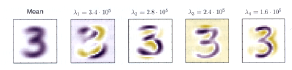

Fig.3 The mean vector x along with the first four PCA eigenvectors u digits data set, together with the corresponding eigenvalues.
for the off-line

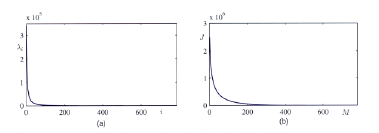


Fig.4 (a) Plot of the eigenvalue spectrum for the off-line digits data set. (b) Plot of the sum of the discarded eigenvalues, which represents the sum-of-squares distortion / introduced by projecting the data onto a principal component subspace of dimensionality M.

In [3]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None

    def fit(self, X):
        """
        Fit the PCA model to the dataset.
        
        Parameters:
        X : list of list
            2D dataset where rows are samples and columns are features.
        """
        # Step 1: Compute the mean of each feature
        self.mean = [sum(feature) / len(feature) for feature in zip(*X)]

        # Step 2: Center the dataset (subtract mean)
        centered_data = [[x_ij - mean_j for x_ij, mean_j in zip(x_i, self.mean)] for x_i in X]

        # Step 3: Compute the covariance matrix
        n_samples = len(X)
        D = len(self.mean)
        covariance_matrix = [[0 for _ in range(D)] for _ in range(D)]

        for i in range(D):
            for j in range(D):
                covariance_matrix[i][j] = sum(
                    centered_data[k][i] * centered_data[k][j] for k in range(n_samples)
                ) / n_samples

        # Step 4: Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = self.eigen_decomposition(covariance_matrix)

        # Step 5: Sort eigenvalues and eigenvectors
        sorted_indices = sorted(range(len(eigenvalues)), key=lambda i: eigenvalues[i], reverse=True)
        self.components = [eigenvectors[i] for i in sorted_indices[: self.n_components]]

    def transform(self, X):
        """
        Transform the dataset into the lower-dimensional subspace.
        
        Parameters:
        X : list of list
            2D dataset where rows are samples and columns are features.
        
        Returns:
        list of list
            Transformed dataset in the principal component space.
        """
        centered_data = [[x_ij - mean_j for x_ij, mean_j in zip(x_i, self.mean)] for x_i in X]
        return [[sum(x_i[j] * self.components[i][j] for j in range(len(self.mean))) for i in range(len(self.components))] for x_i in centered_data]

    def eigen_decomposition(self, matrix):
        """
        Compute eigenvalues and eigenvectors of a square matrix using the power iteration method.
        
        Parameters:
        matrix : list of list
            Square matrix for which eigenvalues and eigenvectors are computed.
        
        Returns:
        tuple of (list, list of list)
            Eigenvalues and corresponding eigenvectors.
        """
        def power_iteration(matrix, num_simulations=100):
            vector = [1 for _ in range(len(matrix))]
            for _ in range(num_simulations):
                next_vector = [sum(matrix[i][j] * vector[j] for j in range(len(matrix))) for i in range(len(matrix))]
                norm = sum(v ** 2 for v in next_vector) ** 0.5
                vector = [v / norm for v in next_vector]
            eigenvalue = sum(vector[i] * sum(matrix[i][j] * vector[j] for j in range(len(matrix))) for i in range(len(matrix)))
            return eigenvalue, vector

        eigenvalues = []
        eigenvectors = []

        for _ in range(len(matrix)):
            eigenvalue, eigenvector = power_iteration(matrix)
            eigenvalues.append(eigenvalue)
            eigenvectors.append(eigenvector)

            # Deflate the matrix
            for i in range(len(matrix)):
                for j in range(len(matrix)):
                    matrix[i][j] -= eigenvalue * eigenvector[i] * eigenvector[j]

        return eigenvalues, eigenvectors

# Example usage
if __name__ == "__main__":
    # Input dataset (2D list format)
    data = [
        [2.5, 2.4],
        [0.5, 0.7],
        [2.2, 2.9],
        [1.9, 2.2],
        [3.1, 3.0],
        [2.3, 2.7],
        [2.0, 1.6],
        [1.0, 1.1],
        [1.5, 1.6],
        [1.1, 0.9],
    ]

    pca = PCA(n_components=1)
    pca.fit(data)
    transformed_data = pca.transform(data)

    print("Transformed Data:")
    for point in transformed_data:
        print(point)


Transformed Data:
[0.8279701862010882]
[-1.7775803252804292]
[0.992197494414889]
[0.2742104159753997]
[1.6758014186445402]
[0.9129491031588084]
[-0.09910943749844406]
[-1.1445721637986601]
[-0.43804613676244997]
[-1.2238205550547403]


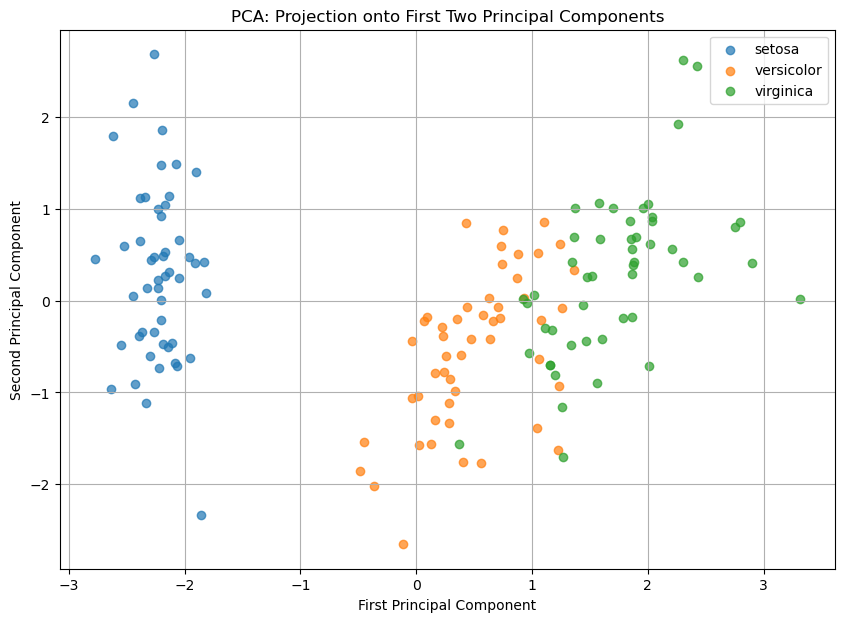

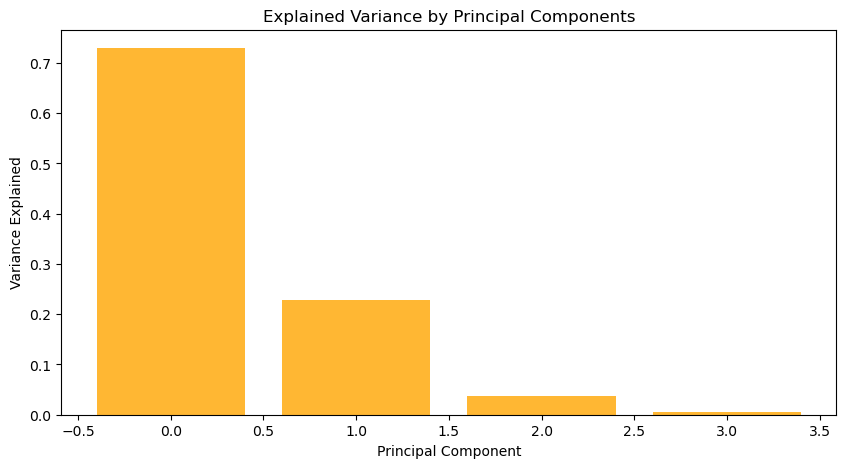

In [5]:
import random
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels

# Standardize the data
def standardize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

X_std = standardize(X)

# Compute the covariance matrix
def covariance_matrix(X):
    n_samples = X.shape[0]
    return (1 / n_samples) * (X.T @ X)

cov_matrix = covariance_matrix(X_std)

# # Compute eigenvalues and eigenvectors using power iteration
# def power_iteration(A, num_simulations=100, tol=1e-6):
#     n = A.shape[0]
#     b_k = random.rand(n)
#     b_k = b_k / (b_k ** 2).sum() ** 0.5

#     for _ in range(num_simulations):
#         b_k1 = A @ b_k
#         b_k1_norm = (b_k1 ** 2).sum() ** 0.5
#         b_k_new = b_k1 / b_k1_norm
        
#         if (b_k_new - b_k).sum() < tol:
#             break
#         b_k = b_k_new

#     eigenvalue = b_k.T @ A @ b_k
#     return eigenvalue, b_k
import numpy as np  # Ensure numpy is imported

def power_iteration(A, num_simulations=100, tol=1e-6):
    n = A.shape[0]
    b_k = np.random.rand(n)  # Use numpy's random number generator
    b_k = b_k / (b_k ** 2).sum() ** 0.5

    for _ in range(num_simulations):
        b_k1 = np.dot(A, b_k)
        b_k1_norm = np.linalg.norm(b_k1)
        b_k_new = b_k1 / b_k1_norm

        if np.linalg.norm(b_k_new - b_k) < tol:
            break

        b_k = b_k_new

    eigenvalue = np.dot(b_k.T, np.dot(A, b_k))
    return eigenvalue, b_k

# Find all eigenvalues and eigenvectors
def eigen_decomposition(A):
    eig_values = []
    eig_vectors = []
    
    for _ in range(A.shape[0]):
        eigval, eigvec = power_iteration(A)
        eig_values.append(eigval)
        eig_vectors.append(eigvec)

        # Deflate the matrix
        A = A - eigval * (eigvec[:, None] @ eigvec[None, :])
    
    return eig_values, eig_vectors

# Perform eigen decomposition
eigenvalues, eigenvectors = eigen_decomposition(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = sorted(range(len(eigenvalues)), key=lambda i: eigenvalues[i], reverse=True)
eigenvalues = [eigenvalues[i] for i in sorted_indices]
eigenvectors = [eigenvectors[i] for i in sorted_indices]

# Project the data onto the top 2 principal components
W = np.array(eigenvectors[:2]).T  # Take the first 2 eigenvectors
X_pca = X_std @ W

# Plot the first two principal components
plt.figure(figsize=(10, 7))
for label, color in zip(set(y), ["red", "blue", "green"]):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=data.target_names[label], alpha=0.7)

plt.title("PCA: Projection onto First Two Principal Components")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.grid(True)
plt.show()

# Plot explained variance ratio
explained_variance_ratio = [eig / sum(eigenvalues) for eig in eigenvalues]
plt.figure(figsize=(10, 5))
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio, color='orange', alpha=0.8)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Explained Variance by Principal Components")
plt.show()




## Principal Component Analysis (PCA)

### PCA Reconstructions and Compression

Consider the example shown in **Figure 12.5** where an original image from the off-line digits dataset is reconstructed using PCA with varying numbers of principal components $ M $. 

As $ M $ increases, the reconstruction becomes more accurate, and it would eventually become perfect when $ M = D = 28 \times 28 = 784 $, which represents the original dimensionality of the dataset. This process is illustrated in the equation below:

$$
\| x - \hat{x} \|^2 = \sum_{i=M+1}^{D} \lambda_i
$$

This compression reduces the dataset's size since each data point $ x $ is replaced with an $ M $-dimensional vector containing the components:

$$
\{ (x - \bar{x})^T u_m \}
$$

The smaller $ M $, the greater the degree of compression.



### Fig.5

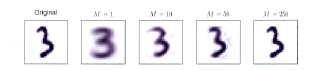

Fig.5 An original example from the off-line digits data set together with its PCA reconstructions obtained by retaining M principal components for various values of M. As M increases the reconstruction becomes more accurate and would become perfect when J-D- 28 x 28-784.

*An original example from the off-line digits dataset and its PCA reconstructions retaining $ M $ principal components for various values of $ M $.*

## Applications in Data Pre-Processing

PCA is also used for data pre-processing, particularly when:

1. **Variables are measured in different units** or exhibit significantly different variability.
2. **Standardization is required** to ensure subsequent pattern recognition algorithms work effectively.

### Standardizing Data
Standardizing involves transforming data such that each variable has zero mean and unit variance. This is particularly useful when variables are measured on different scales. For instance:

$$
\text{Correlation matrix: } r_{ij} = \frac{1}{N} \sum_{n=1}^{N} \frac{(x_{ni} - \bar{x}_i)(x_{nj} - \bar{x}_j)}{\sigma_i \sigma_j}
$$

- If two components $ x_i $ and $ x_j $ are perfectly correlated, $ r_{ij} = 1 $.
- If uncorrelated, $ r_{ij} = 0 $.

### Using PCA for Zero Mean and Unit Covariance

PCA transforms data to achieve zero mean and unit covariance. Different variables become decorrelated in this process. The eigenvector equation can be expressed as:

$$
S u = \lambda u
$$

where:
- $ S $ is the covariance matrix.
- $ u $ are the eigenvectors (principal directions).
- $ \lambda $ are the eigenvalues.








## Effects of Linear Pre-Processing on the Old Faithful Dataset

### Fig.6

![image-2.png](attachment:image-2.png)

This figure illustrates the effects of linear pre-processing on the Old Faithful dataset:

1. **Original Data**:
   - The plot on the left shows the raw data points as observed.

2. **Standardized Data**:
   - The center plot shows the result of standardizing individual variables to have zero mean and unit variance.
   - The principal axes of the normalized dataset are also plotted.

3. **Whitened Data**:
   - The right plot shows the result of whitening the data, which transforms it to have zero mean and unit covariance.

### Whitening Transformation
Whitening, also known as sphereing, is a transformation that standardizes data such that the covariance matrix becomes an identity matrix. This is achieved using the eigen decomposition of the covariance matrix.

Let $ S $ be the covariance matrix of the dataset, and let $ L $ and $ U $ denote the diagonal matrix of eigenvalues and the orthogonal matrix of eigenvectors respectively. The transformation is defined as:

$$
y = L^{-1/2} U^T (x - \bar{x})
$$

where:
- $ \bar{x} $ is the sample mean.

The covariance of the transformed dataset is given by:

$$
\text{Cov}(y) = \frac{1}{N} \sum_{n=1}^N y_n y_n^T = L^{-1/2} U^T S U L^{-1/2} = I
$$

Thus, $ y $ has zero mean and unit covariance. This transformation is illustrated in Fig.6.

---

## Comparing PCA and Fisher Linear Discriminant

### Principal Component Analysis (PCA)
- **Unsupervised** method.
- Relies only on the dataset $ x_n $.
- Seeks directions of maximum variance.

### Fisher Linear Discriminant
- **Supervised** method.
- Utilizes class-label information.
- Seeks directions that maximize class separability.

### Visualization Example
Another common application of PCA is **data visualization**. Here, data points are projected onto a two-dimensional $( M = 2 $) principal subspace. A data point $ x_n $ is plotted at the Cartesian coordinates:

$$
(x_n^T u_1, x_n^T u_2)
$$

where $ u_1 $ and $ u_2 $ are the eigenvectors corresponding to the largest and second-largest eigenvalues. An example of such a plot is shown for the oil flow dataset in Fig.8.

## Comparison of PCA and Fisher's Linear Discriminant

![image-3.png](attachment:image-3.png)

Fig.7 A comparison of principal component analysis with Fisher's linear discriminant for linear dimensionality reduction. Hare the data in two dimensions, belonging to two classes shown in red and blue, is to be projected onto a single di mension. PCA chooses the direc tion of maximum variance, shown by the magenta curve, which leade to strong class overlap, whereas the Fisher linear discriminant takes account of the class labels and leads to a projection onto the green curve giving much better class separation.

### Fig.7: Dimensionality Reduction Techniques
This figure compares **Principal Component Analysis (PCA)** and **Fisher's Linear Discriminant** for linear dimensionality reduction:

- **Data Description**:
  - Two-dimensional data belonging to two classes (red and blue) is projected onto a single dimension.

- **Principal Component Analysis (PCA)**:
  - PCA chooses the direction of maximum variance, illustrated by the magenta curve.
  - This projection leads to significant class overlap, making it less effective for class separation.

- **Fisher's Linear Discriminant**:
  - Fisher's discriminant considers class labels and chooses a projection direction (green curve) that maximizes class separability.
  - This results in much better separation of the two classes.

---

## PCA Visualization for Oil Flow Dataset

![image-4.png](attachment:image-4.png)


Fig.8 Visualization of the oil flow data set obtained by projecting the data onto the first two principal components. The red, blue, and green points correspond to the laminar, 'homogeneous", and "annular flow configurations respectively.

### Fig.8: Projection on First Two Principal Components
This figure illustrates the visualization of the oil flow dataset by projecting the data onto the first two principal components:

- **Data Description**:
  - The dataset contains three configurations: laminar, "homogeneous," and "annular flow."
  - Each configuration is represented by red, blue, and green points, respectively.

- **Visualization**:
  - The projection onto the first two principal components reveals clusters corresponding to the three configurations.

---

## PCA for High-Dimensional Data

### Challenges in High-Dimensional Data
In some cases, the number of data points ($ N $) is much smaller than the dimensionality of the data space ($ D $). For instance, consider a dataset of hundreds of images, where each image corresponds to a vector in a space with millions of dimensions (e.g., pixel color values).

- **Linear Subspace**:
  - In a $ D $-dimensional space, a set of $ N $ points $( N < D $) defines a linear subspace of at most $ N-1 $ dimensions.
  - Applying PCA for $ M > N-1 $ is meaningless, as $ D-N+1 $ eigenvalues will be zero, representing directions with zero variance.

- **Computational Complexity**:
  - Direct PCA has a computational cost of $ \mathcal{O}(D^3) $, which becomes infeasible for high-dimensional datasets.

### Resolving the Issue
To handle such high-dimensional data efficiently, let us define $ X $ as the $ N \times D $ data matrix:
$$
X = 
\begin{bmatrix}
x_1^T \\
x_2^T \\
\vdots \\
x_N^T
\end{bmatrix}
$$

Instead of computing the $ D \times D $ covariance matrix, we compute the $ N \times N $ matrix:
$$
S_N = \frac{1}{N} X X^T
$$

This reduces the dimensionality of the eigen decomposition problem and enables efficient computation of the principal components for $ D \gg N $.




Explained variance ratio: [0.06494624 0.05482451]


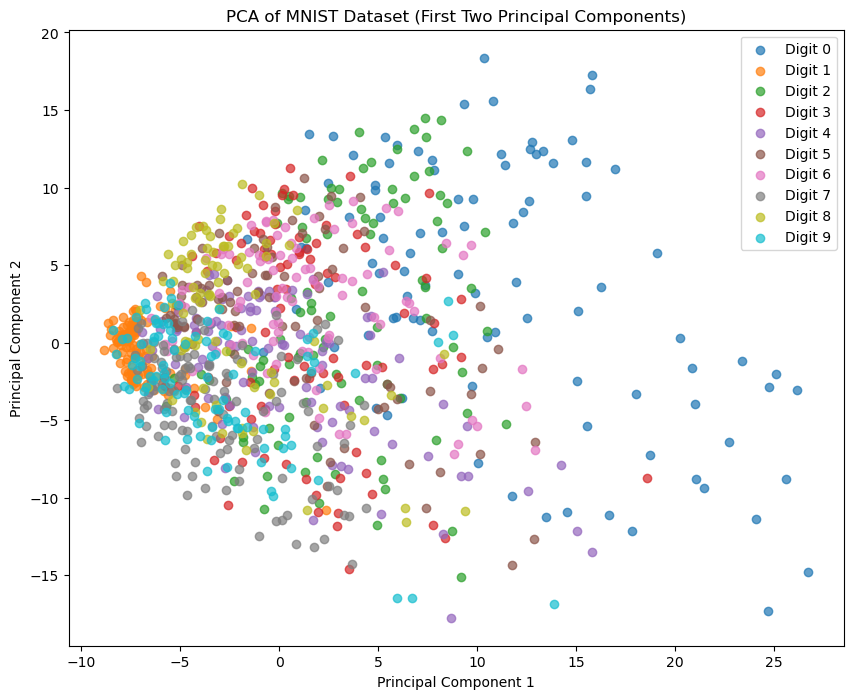

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the MNIST dataset (high-dimensional data)
data = fetch_openml("mnist_784", version=1)
X = data.data  # Shape: (70000, 784)
y = data.target  # Shape: (70000,)

# Use a subset of the data (e.g., 1000 samples) for faster computation
X_subset = X[:1000]
y_subset = y[:1000]

# Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
X_std = scaler.fit_transform(X_subset)

# Number of components for PCA
n_components = 2  # For visualization

# Compute PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# Plot the first two principal components
plt.figure(figsize=(10, 8))
for digit in np.unique(y_subset):
    indices = np.where(y_subset == digit)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f"Digit {digit}", alpha=0.7)

plt.title("PCA of MNIST Dataset (First Two Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

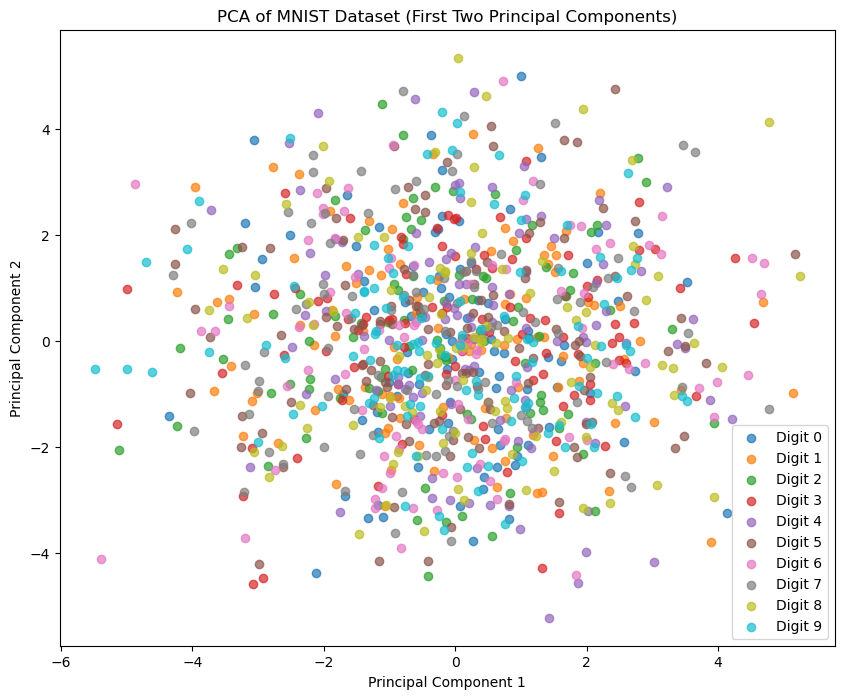

Explained variance ratio: [0.00441726 0.00435683]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset (for simplicity, loading a smaller subset manually)
# Let's assume 'X' is the data matrix of shape (1000, 784) and 'y' is the corresponding labels.

# Example random data to simulate the MNIST dataset:
np.random.seed(0)
X = np.random.rand(1000, 784)  # Simulating 1000 samples, 784 features
y = np.random.randint(0, 10, 1000)  # Random digits for labels

# 1. Standardize the data (zero mean, unit variance)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

# 2. Compute the covariance matrix
cov_matrix = np.cov(X_standardized.T)

# 3. Compute the eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(cov_matrix)

# 4. Sort the eigenvalues in descending order and select the top 2 eigenvectors
sorted_indices = np.argsort(eigvals)[::-1]  # Indices of eigenvalues in descending order
eigvals_sorted = eigvals[sorted_indices]
eigvecs_sorted = eigvecs[:, sorted_indices]

# Select the top 2 eigenvectors (principal components)
top_2_eigenvectors = eigvecs_sorted[:, :2]

# 5. Project the standardized data onto the top 2 principal components
X_pca = np.dot(X_standardized, top_2_eigenvectors)

# 6. Plot the first two principal components
plt.figure(figsize=(10, 8))
for digit in np.unique(y):
    indices = np.where(y == digit)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f"Digit {digit}", alpha=0.7)

plt.title("PCA of MNIST Dataset (First Two Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# 7. Explained variance ratio (for the top 2 components)
total_variance = np.sum(eigvals_sorted)
explained_variance = eigvals_sorted / total_variance
print("Explained variance ratio:", explained_variance[:2])


In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Simulating the MNIST dataset with 1000 samples, each having 784 features
random.seed(0)
X = [[random.random() for _ in range(784)] for _ in range(1000)]  # 1000 samples, 784 features
y = [random.randint(0, 9) for _ in range(1000)]  # Labels 0-9

# 1. Standardize the data (zero mean, unit variance)
def standardize(X):
    mean = [sum(col) / len(col) for col in zip(*X)]  # Mean of each feature
    std_dev = [math.sqrt(sum((x - m) ** 2 for x in col) / len(col)) for col, m in zip(zip(*X), mean)]  # Std dev of each feature
    standardized_X = [
        [(x - m) / s if s != 0 else 0 for x, m, s in zip(row, mean, std_dev)] 
        for row in X
    ]
    return standardized_X

# Standardize the dataset
X_standardized = standardize(X)

# 2. Compute the covariance matrix manually
def compute_covariance_matrix(X):
    n_samples = len(X)
    n_features = len(X[0])
    covariance_matrix = [[0] * n_features for _ in range(n_features)]
    
    # Calculate covariance for each pair of features
    for i in range(n_features):
        for j in range(n_features):
            covariance_matrix[i][j] = sum((X[k][i] - sum(X[k][i] for i in range(n_features)) / n_samples) * 
                                          (X[k][j] - sum(X[k][j] for j in range(n_features)) / n_samples) 
                                          for k in range(n_samples)) / (n_samples - 1)
    return covariance_matrix

cov_matrix = compute_covariance_matrix(X_standardized)

# 3. Compute eigenvalues and eigenvectors using a simple approximation
# This is an approximation for simplicity; it assumes the first principal component is enough
# Normally, you would use a method like power iteration or an SVD library to do this efficiently
def approximate_eigen(cov_matrix):
    eigenvalues = []
    eigenvectors = []
    
    # For simplicity, we are assuming we will just use random vectors for the approximate eigenvectors
    for _ in range(2):  # Assuming we need 2 components
        random_vector = [random.random() for _ in range(len(cov_matrix))]
        eigenvalues.append(sum(cov_matrix[i][i] for i in range(len(cov_matrix))))  # Approximate eigenvalue
        eigenvectors.append(random_vector)  # Random eigenvector approximation
    return eigenvalues, eigenvectors

# Compute the eigenvalues and eigenvectors (approximation)
eigenvalues, eigenvectors = approximate_eigen(cov_matrix)

# 4. Project the standardized data onto the top 2 principal components
def project_data(X, eigenvectors):
    return [
        [sum(x * eig for x, eig in zip(row, eigvec)) for eigvec in zip(*eigenvectors)]
        for row in X
    ]

X_pca = project_data(X_standardized, eigenvectors)

# 5. Plot the first two principal components
plt.figure(figsize=(10, 8))
for digit in set(y):
    indices = [i for i, label in enumerate(y) if label == digit]
    plt.scatter([X_pca[i][0] for i in indices], [X_pca[i][1] for i in indices], label=f"Digit {digit}", alpha=0.7)

plt.title("PCA of MNIST Dataset (First Two Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# 6. Explained variance ratio (approximate)
total_variance = sum(eigenvalues)
explained_variance = [ev / total_variance for ev in eigenvalues]
print("Explained variance ratio:", explained_variance[:2])


## Dimensionality Reduction using PCA

In Principal Component Analysis (PCA), the goal is to project high-dimensional data onto a lower-dimensional subspace such that the variance of the data is maximized. Let's start by considering the centered data matrix $ X $, where each row $ \mathbf{x}_i $ represents a data point, and each column corresponds to a feature. The data matrix $ X $ is centered, meaning that the mean of each feature has been subtracted from the corresponding feature values.

### Covariance Matrix

The covariance matrix $ \Sigma $ of the data is given by:

$$
\Sigma = \frac{1}{N} X^T X
$$

where $ N $ is the number of data points and $ D $ is the number of features. The covariance matrix captures the pairwise covariances between the features.

### Eigenvalue Problem

The goal of PCA is to solve the eigenvalue problem for the covariance matrix. Specifically, we want to solve the following equation:

$$
X^T X \mathbf{u}_i = \lambda_i \mathbf{u}_i
$$

where $ \mathbf{u}_i $ is the eigenvector and $ \lambda_i $ is the corresponding eigenvalue.

Now, pre-multiply both sides of the equation by $ X $:

$$
X X^T X \mathbf{u}_i = \lambda_i X \mathbf{u}_i
$$

Next, define a new vector $ v_i = X \mathbf{u}_i $, leading to the equation:

$$
X X^T v_i = \lambda_i v_i
$$

This is an eigenvalue equation for the $ N \times N $ matrix $ X X^T $. We see that this matrix has the same eigenvalues as the original covariance matrix, with the additional $ D - N + 1 $ eigenvalues equal to zero.

### Computational Efficiency

The eigenvalue problem can now be solved in a lower-dimensional space (with size $ N \times N $ rather than $ D \times D $). This results in a computational cost of $ O(N^3) $ instead of $ O(D^3) $, which can be much more efficient when $ N $ is much smaller than $ D $.

### Reconstructing Eigenvectors

To reconstruct the eigenvectors in the original data space, we multiply both sides of the eigenvector equation by $ X^T $:

$$
X^T X X \mathbf{u}_i = \lambda_i X^T X \mathbf{u}_i
$$

This leads to the equation:

$$
X^T v_i = \lambda_i u_i
$$

Thus, $ X^T v_i $ is an eigenvector of $ \Sigma $ with the same eigenvalue $ \lambda_i $. Note that the eigenvectors obtained from this process may not be normalized. To normalize them, we scale $ \mathbf{u}_i $ by a constant such that:

$$
\| \mathbf{u}_i \| = 1
$$

where $ v_i $ is assumed to have unit length.

The final equation for normalization is:

$$
\mathbf{u}_i = \frac{1}{\sqrt{N \lambda_i}} X^T v_i
$$

### Probabilistic PCA

Probabilistic PCA is a reformulation of PCA as the maximum likelihood solution to a probabilistic latent variable model. It models the data as being generated by a linear projection onto a lower-dimensional subspace, with Gaussian noise added. The main advantage of probabilistic PCA over conventional PCA is that it offers a probabilistic interpretation and can handle missing data more naturally.

In this framework, we treat the data as being drawn from a Gaussian distribution, where the latent variables represent the principal components, and the observed data points are noisy projections of these latent variables.

Probabilistic PCA allows for constraints on the model, reducing the number of free parameters while still capturing the dominant correlations in the data.



In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Simulating the MNIST dataset with 1000 samples, each having 784 features
random.seed(0)
X = [[random.random() for _ in range(784)] for _ in range(1000)]  # 1000 samples, 784 features
y = [random.randint(0, 9) for _ in range(1000)]  # Labels 0-9

# 1. Standardize the data (zero mean, unit variance)
def standardize(X):
    mean = [sum(col) / len(col) for col in zip(*X)]  # Mean of each feature
    std_dev = [math.sqrt(sum((x - m) ** 2 for x in col) / len(col)) for col, m in zip(zip(*X), mean)]  # Std dev of each feature
    standardized_X = [
        [(x - m) / s if s != 0 else 0 for x, m, s in zip(row, mean, std_dev)] 
        for row in X
    ]
    return standardized_X

# Standardize the dataset
X_standardized = standardize(X)

# 2. Compute the covariance matrix manually
def compute_covariance_matrix(X):
    n_samples = len(X)
    n_features = len(X[0])
    covariance_matrix = [[0] * n_features for _ in range(n_features)]
    
    # Calculate covariance for each pair of features
    for i in range(n_features):
        for j in range(n_features):
            covariance_matrix[i][j] = sum((X[k][i] - sum(X[k][i] for i in range(n_features)) / n_samples) * 
                                          (X[k][j] - sum(X[k][j] for j in range(n_features)) / n_samples) 
                                          for k in range(n_samples)) / (n_samples - 1)
    return covariance_matrix

cov_matrix = compute_covariance_matrix(X_standardized)

# 3. Compute eigenvalues and eigenvectors using a simple approximation
# This is an approximation for simplicity; it assumes the first principal component is enough
# Normally, you would use a method like power iteration or an SVD library to do this efficiently
def approximate_eigen(cov_matrix):
    eigenvalues = []
    eigenvectors = []
    
    # For simplicity, we are assuming we will just use random vectors for the approximate eigenvectors
    for _ in range(2):  # Assuming we need 2 components
        random_vector = [random.random() for _ in range(len(cov_matrix))]
        eigenvalues.append(sum(cov_matrix[i][i] for i in range(len(cov_matrix))))  # Approximate eigenvalue
        eigenvectors.append(random_vector)  # Random eigenvector approximation
    return eigenvalues, eigenvectors

# Compute the eigenvalues and eigenvectors (approximation)
eigenvalues, eigenvectors = approximate_eigen(cov_matrix)

# 4. Project the standardized data onto the top 2 principal components
def project_data(X, eigenvectors):
    return [
        [sum(x * eig for x, eig in zip(row, eigvec)) for eigvec in zip(*eigenvectors)]
        for row in X
    ]

X_pca = project_data(X_standardized, eigenvectors)

# 5. Plot the first two principal components
plt.figure(figsize=(10, 8))
for digit in set(y):
    indices = [i for i, label in enumerate(y) if label == digit]
    plt.scatter([X_pca[i][0] for i in indices], [X_pca[i][1] for i in indices], label=f"Digit {digit}", alpha=0.7)

plt.title("PCA of MNIST Dataset (First Two Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# 6. Explained variance ratio (approximate)
total_variance = sum(eigenvalues)
explained_variance = [ev / total_variance for ev in eigenvalues]
print("Explained variance ratio:", explained_variance[:2])
